<a href="https://colab.research.google.com/github/rkp74/Stock_Price_Prediction_using_LSTM/blob/main/Stock_Market_Prediction_And_Forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas_datareader as pdr

In [26]:
df = pdr.get_data_tiingo('AAPL' , api_key = "")

/usr/local/lib/python3.9/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [27]:
df.to_csv('AAPL.csv')

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('AAPL.csv')

In [30]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-11 00:00:00+00:00,172.44,173.92,171.70,172.23,22431640,41.042029,41.394281,40.865904,40.992048,89726560,0.0,1.0
1,AAPL,2018-04-12 00:00:00+00:00,174.14,175.00,173.04,173.41,22889285,41.446642,41.651329,41.184834,41.272897,91557140,0.0,1.0
2,AAPL,2018-04-13 00:00:00+00:00,174.73,175.84,173.85,174.78,25124255,41.587067,41.851255,41.377620,41.598967,100497020,0.0,1.0
3,AAPL,2018-04-16 00:00:00+00:00,175.82,176.19,174.83,175.03,21578420,41.846495,41.934558,41.610867,41.658469,86313680,0.0,1.0
4,AAPL,2018-04-17 00:00:00+00:00,178.24,178.94,176.41,176.49,26605442,42.422473,42.589079,41.986919,42.005960,106421768,0.0,1.0


In [31]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-03-31 00:00:00+00:00,164.90,165.0000,161.91,162.440,68749792,164.90,165.0000,161.91,162.440,68749792,0.0,1.0
1253,AAPL,2023-04-03 00:00:00+00:00,166.17,166.2900,164.22,164.270,56976187,166.17,166.2900,164.22,164.270,56976187,0.0,1.0
1254,AAPL,2023-04-04 00:00:00+00:00,165.63,166.8400,165.11,166.595,46278295,165.63,166.8400,165.11,166.595,46278295,0.0,1.0
1255,AAPL,2023-04-05 00:00:00+00:00,163.76,165.0500,161.80,164.740,51511744,163.76,165.0500,161.80,164.740,51511744,0.0,1.0
1256,AAPL,2023-04-06 00:00:00+00:00,164.66,164.9584,162.00,162.430,45390123,164.66,164.9584,162.00,162.430,45390123,0.0,1.0


In [32]:
df2 = df.reset_index()['close']

In [33]:
df2[1228:]

1228    147.92
1229    147.41
1230    145.31
1231    145.91
1232    151.03
1233    153.83
1234    151.60
1235    152.87
1236    150.59
1237    148.50
1238    150.47
1239    152.59
1240    152.99
1241    155.85
1242    155.00
1243    157.40
1244    159.28
1245    157.83
1246    158.93
1247    160.25
1248    158.28
1249    157.65
1250    160.77
1251    162.36
1252    164.90
1253    166.17
1254    165.63
1255    163.76
1256    164.66
Name: close, dtype: float64

In [34]:
df1 = df.reset_index()['close']

In [35]:
df1.shape

(1257,)

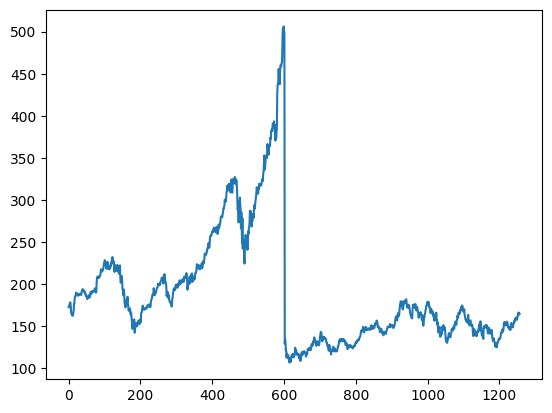

In [36]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [37]:
import numpy as np

In [38]:
## LSTM are sensitive to the scale of the data.So we generally apply MinMax scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
df1.shape

(1257, 1)

In [40]:
print(df1)

[[0.16430808]
 [0.16856606]
 [0.17004383]
 ...
 [0.1472511 ]
 [0.14256731]
 [0.14482154]]


In [41]:
## Time Series Data --> Train and Test Spilt --> 
## Data = 120,130,125,140,134,150,160,190,154
## Train = 120,130,125,140,134,150
## Test = 160,190,154

train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data , test_data = df1[0:train_size,:] , df1[train_size:len(df1),:1]

In [42]:
train_size

817

In [43]:
test_size

440

In [44]:
def create_dataset(dataset,time_step=1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i: (i + time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)


In [46]:
time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [47]:
print(X_train)

[[0.16430808 0.16856606 0.17004383 ... 0.28268003 0.29089543 0.29603006]
 [0.16856606 0.17004383 0.17277395 ... 0.29089543 0.29603006 0.30254227]
 [0.17004383 0.17277395 0.17883532 ... 0.29603006 0.30254227 0.3043707 ]
 ...
 [0.07306199 0.07150908 0.07085786 ... 0.07386349 0.07544145 0.07621791]
 [0.07150908 0.07085786 0.07145899 ... 0.07544145 0.07621791 0.08295554]
 [0.07085786 0.07145899 0.06599875 ... 0.07621791 0.08295554 0.08811522]]


In [49]:
print(X_train.shape)

(716, 100)


In [50]:
print(X_test.shape)

(339, 100)


In [54]:
print(y_train.shape)

(716,)


In [52]:
print(y_test.shape)

(339,)


In [58]:
# reshape input to be [samples,time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [59]:
X_train.shape[0]

716

In [60]:
X_train.shape[1]

100

In [61]:
X_train.shape

(716, 100, 1)

In [ ]:
### Create the LSTM Model
